In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
PATH = "../data/census/disability/"
df_21 = pd.read_csv(PATH + "poverty_by_disability_17to21.csv")
df_16 = pd.read_csv(PATH + "poverty_by_disability_12to16.csv")

In [3]:
# White
# Black or African American
# American Indian and Alaska Native
# Asian
# Native Hawaiian and Other Pacific Islander
# Some Other Race alone

def fix_labels(df):
    df["Label (Grouping)"] = df["Label (Grouping)"].map(lambda x: x.lstrip('\xa0'))

    
def get_topics_idcs(df):
    return df[df.isna().any(axis=1)].index


def get_topics(df):
    # Get IDCS of Grouping Rows
    idcs = get_topics_idcs(df)
    idx_pairs = [(idcs[i], idcs[i+1]) if i < (len(idcs) - 1) else (idcs[i],) for i in range(len(idcs))]
    
    # Format the labels
    fix_labels(df)
    
    labels = df.iloc[idcs]["Label (Grouping)"].values
    return list(zip(idx_pairs, labels))


def get_all_sub_dfs(df):
    
    all_subtopics = get_topics(df)
    topic = {}
    subtopics = []
    
    for subtopic_idcs, subtopic in all_subtopics:
        
        if len(subtopic_idcs) == 2:
            topic[subtopic] = df.iloc[subtopic_idcs[0] + 1:subtopic_idcs[1]]
        else:
            topic[subtopic] = df.iloc[subtopic_idcs[0] + 1:]
            
        # Check whether the first row contains values of interest
        if not df.iloc[0].isna().any():
            topic[subtopic].loc[-1] = df.loc[0]                # adding a row
            topic[subtopic].index = topic[subtopic].index + 1  # shifting index
            topic[subtopic] = topic[subtopic].sort_index()     # sorting by index

            
        topic[subtopic] = topic[subtopic].rename(columns={"Label (Grouping)": subtopic})
        topic[subtopic].set_index(subtopic, inplace=True)
        subtopics.append(subtopic)
            
    subtopics = '\n'.join([subtopic for subtopic in subtopics])
    print("The subtopics are:")
    print(subtopics)
    
    return topic


def convert_series_to_int(series):
    new_series = [int("".join(x.split(","))) if type(x) == str else x for x in series.values]
    return np.asarray(new_series)


In [7]:
fix_labels(df_21)
fix_labels(df_16)

In [56]:
def fix_indices(df):
    df.index = df["Label (Grouping)"].values
    df.drop(columns="Label (Grouping)", inplace=True)

In [62]:
# Relevant rows (Disability - In Labor Force, Disability - Not in Labor Force, No Disability)
below_poverty = [3, 8, 9]
above_poverty = [18, 23, 24]

In [63]:
below_poverty_16 = df_16.iloc[below_poverty]
below_poverty_21 = df_21.iloc[below_poverty]

above_poverty_16 = df_16.iloc[above_poverty]
above_poverty_21 = df_21.iloc[above_poverty]

In [80]:
fix_indices(below_poverty_16)
fix_indices(below_poverty_21)
fix_indices(above_poverty_16)
fix_indices(above_poverty_21)

In [88]:
below_poverty = [below_poverty_21, below_poverty_16]
above_poverty = [above_poverty_21, above_poverty_16]

curr_list = below_poverty

for idx in range(len(curr_list)):
    
    # Preprocess data
    all_columns = []
    for column in curr_list[idx].iloc[:-1].columns:
        if "Percent" in column:
            all_columns.append(column)

    curr_list[idx].drop(columns=all_columns, inplace=True)
    curr_list[idx] = curr_list[idx].apply(convert_series_to_int)

    curr_list[idx].columns = [x[1].split(", District")[0][1:] + " - " + x[0][:-2] for x in curr_list[idx].columns.str.split("Census")]
    curr_list[idx] = curr_list[idx].iloc[:]

In [153]:
# What would be good to look at?

# 1. Percentage of Tract that is below poverty level
# 2. Percentage of which race makes up which portion of Below poverty level
# 3. Percentage of how many of a race are below poverty level

curr_list[0]

,Tract 64 - Block Group 1,Tract 64 - Block Group 2,Tract 102.01 - Block Group 1,Tract 102.01 - Block Group 2,Tract 102.01 - Block Group 3,Tract 102.02 - Block Group 1,Tract 102.02 - Block Group 2,Tract 102.02 - Block Group 3,Tract 102.02 - Block Group 4,Tract 102.02 - Block Group 5,...,Tract 105 - Block Group 1,Tract 105 - Block Group 2,Tract 105 - Block Group 3,Tract 105 - Block Group 4,Tract 105 - Block Group 5,Tract 110.01 - Block Group 1,Tract 110.01 - Block Group 2,Tract 110.01 - Block Group 3,Tract 110.02 - Block Group 1,Tract 110.02 - Block Group 2
In labor force:,13,29,0,0,0,0,0,0,0,0,...,0,0,35,0,0,0,0,0,41,0
Not in labor force,69,97,0,0,17,0,0,0,0,0,...,0,63,19,0,19,0,22,0,0,0
No disability:,164,180,59,28,21,0,75,0,28,9,...,0,88,302,0,52,0,0,20,0,0


In [155]:
tracts = ["Tract 64", "Tract 102.01", "Tract 102.02", "Tract 105", "Tract 110.01", "Tract 110.02"]
tract_df = curr_list[0].loc[:, curr_list[0].columns.str.contains(tracts[-2])]
tract_df

,Tract 110.01 - Block Group 1,Tract 110.01 - Block Group 2,Tract 110.01 - Block Group 3
In labor force:,0,0,0
Not in labor force,0,22,0
No disability:,0,0,20


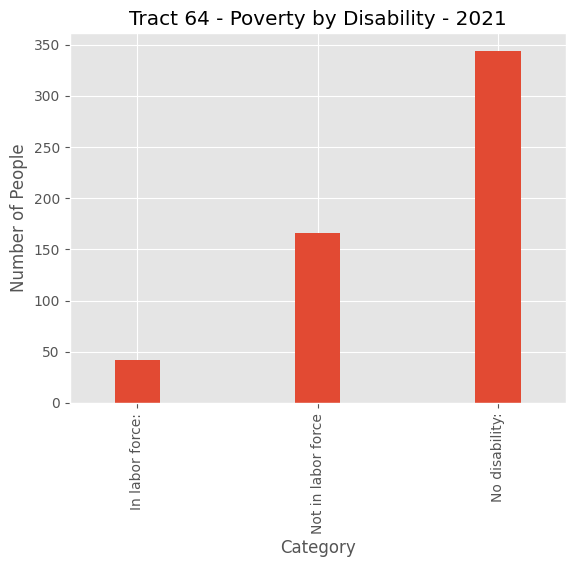

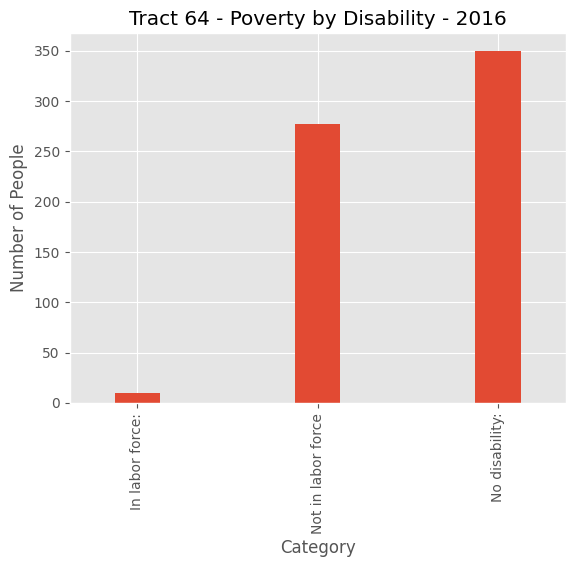

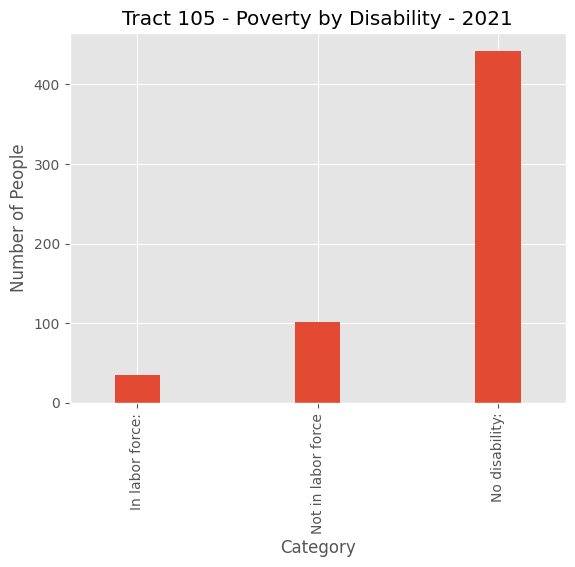

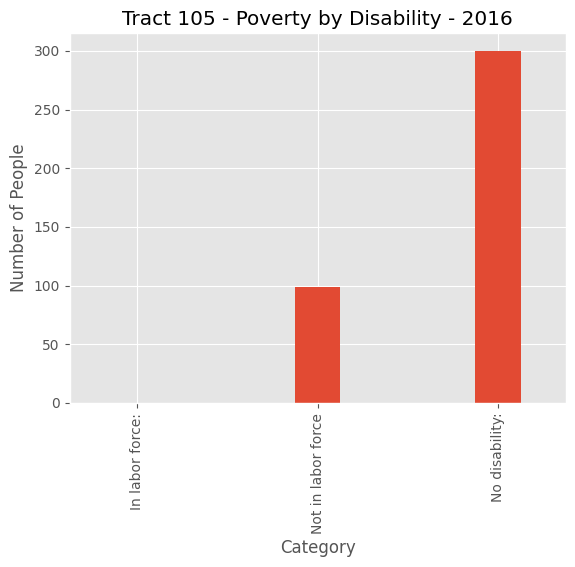

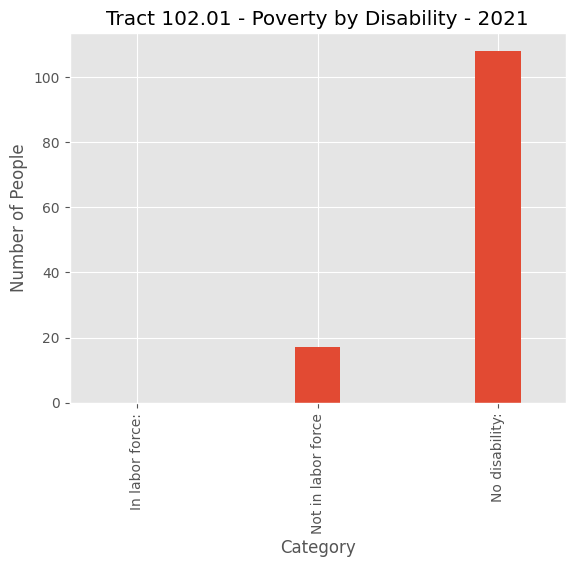

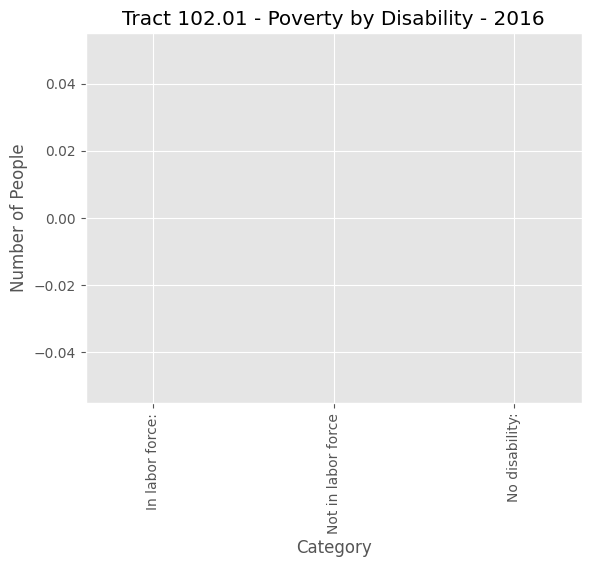

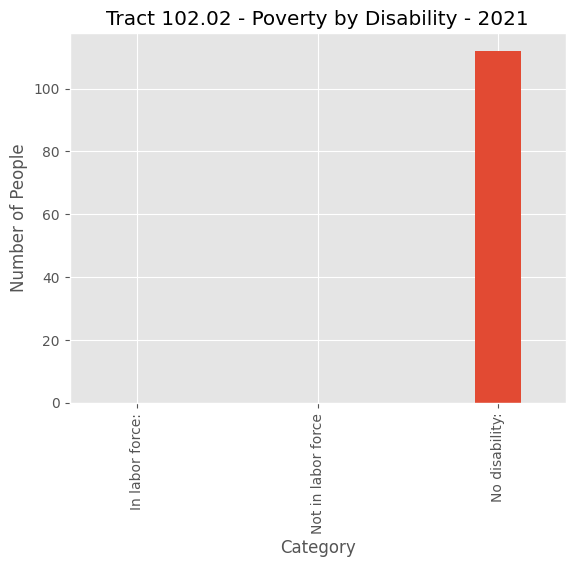

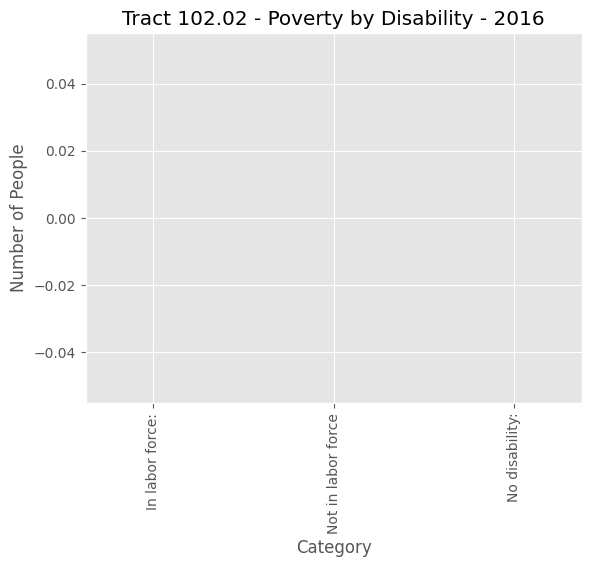

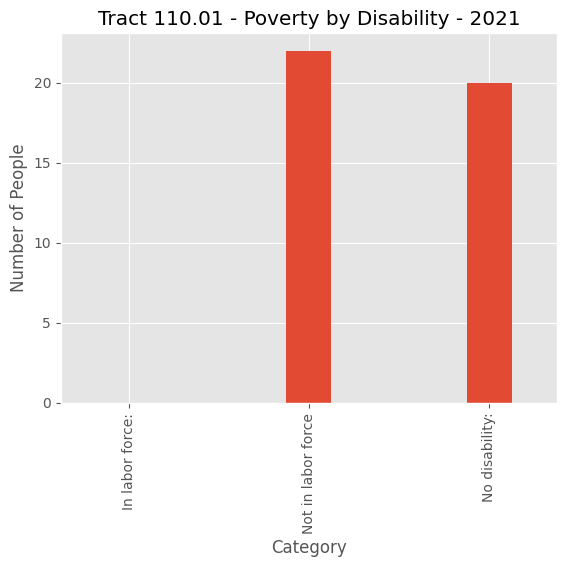

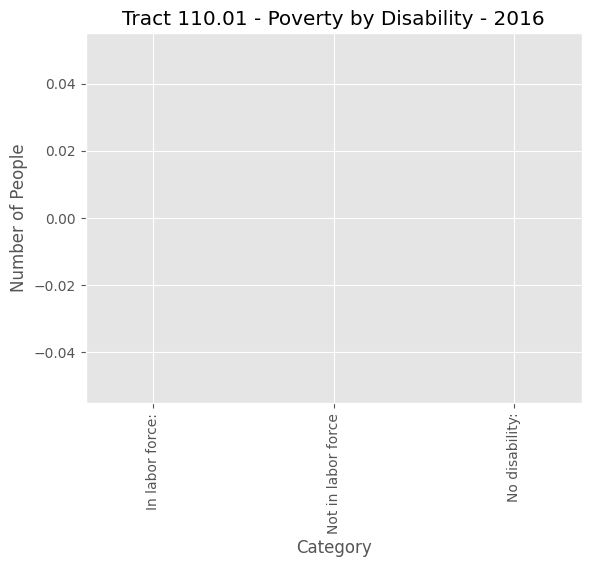

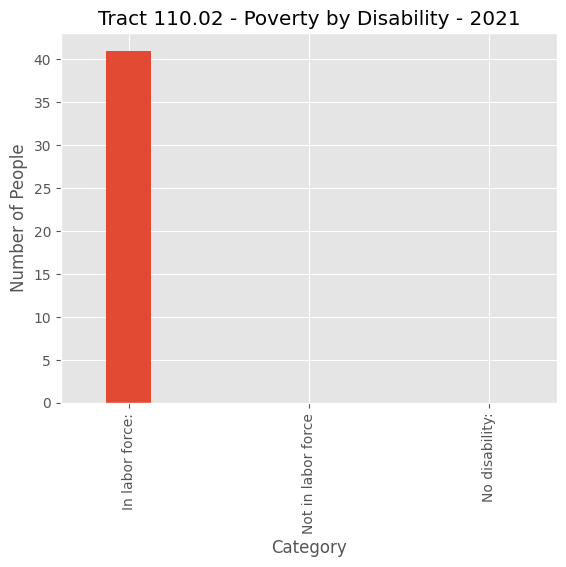

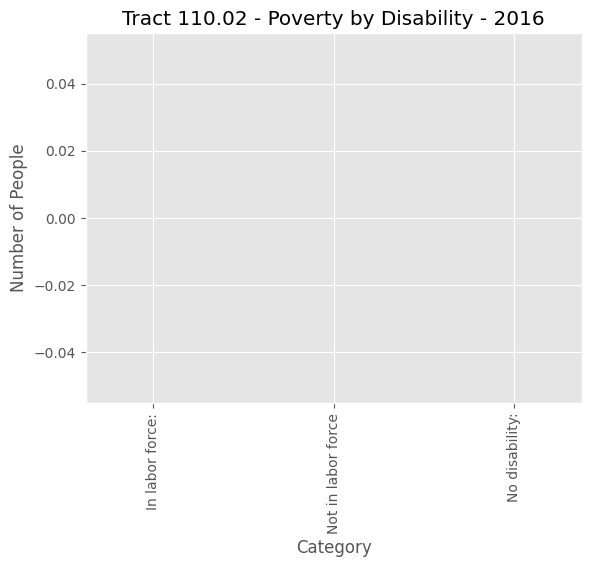

In [151]:
import matplotlib
matplotlib.style.use('ggplot')

tracts = ["Tract 64", "Tract 105", "Tract 102.01", "Tract 102.02", "Tract 110.01", "Tract 110.02"]
years = ["2021", "2016"]

for tract in tracts:
    
    for idx, year in enumerate(years):
        
        try:
            tract_df = curr_list[idx].loc[:, curr_list[idx].columns.str.contains(tract)]
            
            fig, ax = plt.subplots()
            tract_df.T.plot(kind="bar", ax=ax, position=0.5, width=0.25)
            ax.set_xticklabels([str(x) for x in range(1, len(tract_df.columns) + 1)])

            plt.xlabel("Block Group")
            plt.ylabel("Number of People")
            plt.title(f"{tract} - Poverty by Disability - {year}")
            plt.legend(["Disabled - In Labor Force", "Disabled - Not in Labor Force", "Not Disabled"])
        
            plt.savefig(f"../plots/disability/poverty_by_disability/{tract}_{year}.png")
            
        except IndexError:
            continue

In [156]:
# Make Plots for all block groups summed up (to get tract level data)

import matplotlib
matplotlib.style.use('ggplot')

tracts = ["Tract 64", "Tract 105", "Tract 102.01", "Tract 102.02", "Tract 110.01", "Tract 110.02"]
years = ["2021", "2016"]

year_dict = {}
for idx, year in enumerate(years):
    tract_dict = {}
    
    for tract in tracts:
        
        try:
            tract_df = curr_list[idx].loc[:, curr_list[idx].columns.str.contains(tract)]
            tract_dict[tract] = tract_df.sum(axis=1)
            
            
        except IndexError:
            continue
    
    year_dict[year] = tract_dict

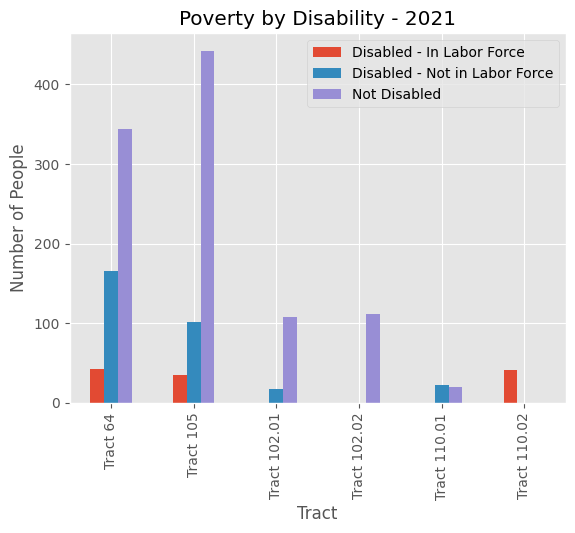

In [180]:
year = "2021"
pd.DataFrame.from_dict(year_dict[year]).T.plot(kind="bar")
plt.xlabel("Tract")
plt.ylabel("Number of People")
plt.title(f"Poverty by Disability - {year}")
plt.legend(["Disabled - In Labor Force", "Disabled - Not in Labor Force", "Not Disabled"])

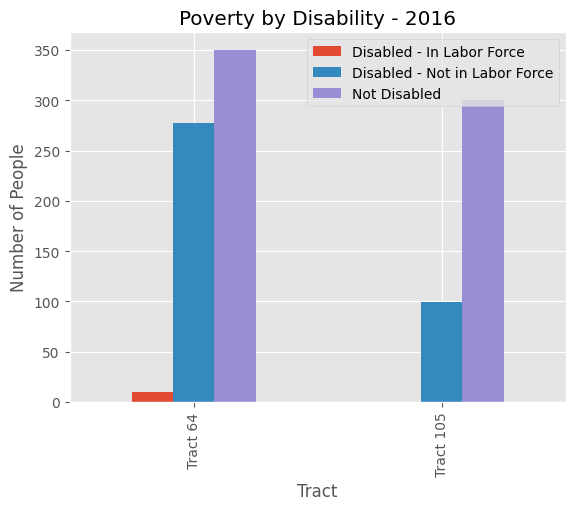

In [181]:
year = "2016"
pd.DataFrame.from_dict(year_dict[year]).T.iloc[:2].plot(kind="bar")
plt.xlabel("Tract")
plt.ylabel("Number of People")
plt.title(f"Poverty by Disability - {year}")
plt.legend(["Disabled - In Labor Force", "Disabled - Not in Labor Force", "Not Disabled"])